<a href="https://colab.research.google.com/github/liuchentue/SVM-based-human-detection/blob/main/Faster_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install dependencies: 
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8MB 26kB/s 
     |████████████████████████████████| 6.6MB 3.1MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
     |████████████████████████████████| 276kB 12.9MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44076 sha256=01051f829ff435372666c4bbb42462f3f4b33e7caf07e68fb10b54c7f064709c
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip

In [ ]:
# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2

# get image
!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg
im = cv2.imread("./input.jpg")

# Create config
cfg = get_cfg()
cfg.merge_from_file("/usr/local/lib/python3.6/dist-packages/detectron2/model_zoo/configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl"

# Create predictor
predictor = DefaultPredictor(cfg)

# Make prediction
outputs = predictor(im)

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



--2020-12-13 23:43:49--  http://images.cocodataset.org/val2017/000000439715.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.0.236
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.0.236|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209222 (204K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>] 204.32K  --.-KB/s    in 0.01s   

2020-12-13 23:43:49 (19.6 MB/s) - ‘input.jpg’ saved [209222/209222]



model_final_f6e8b1.pkl: 243MB [00:10, 22.3MB/s]                           


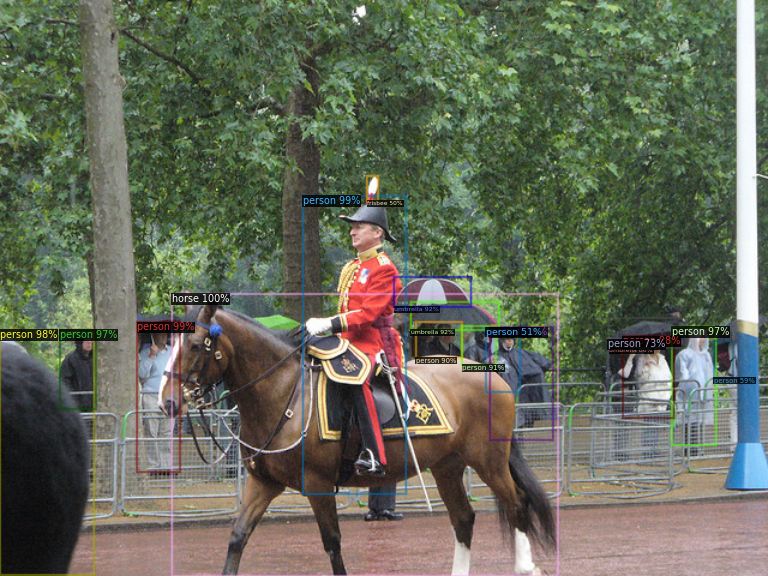

In [ ]:
from google.colab.patches import cv2_imshow
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])


In [ ]:
import tensorflow as tf
#Function for counting the number of people present in the image
def CountPerson(img):
  # Create predictor
  predictor = DefaultPredictor(cfg)
  # Make prediction
  outputs = predictor(img)
  inst=outputs["instances"]
  #extract the information from the predictor outputs
  classes=inst.get("pred_classes")
  precision=inst.get("scores")
  locations=inst.get("pred_boxes")
  #classes: what type of object is detected (for example, 0 for person; 25 for umbrella; 17 for horse) (based on COCO dataset)
  #locations: the boxes locations of the detected objects (in our case, there are 17 boxes in the example photo)
  #precision: the probability of the corresponding object classification to be accurate
  classes=tf.make_ndarray(tf.make_tensor_proto(classes.cpu())) 
  precision=tf.make_ndarray(tf.make_tensor_proto(precision.cpu())) 
  locations=tf.make_ndarray(tf.make_tensor_proto(locations.tensor.cpu()))
  numofperson=0
  for i in range(len(classes)):
    if (classes[i]==0):
      numofperson=numofperson+1
  print("Number of people in the picture:",numofperson)


#Example showing how to use this function with the sample image
CountPerson(im)

Number of people in the picture: 12


In [ ]:
 #Function for getting the locations of persons from the image using the Faster RCNN
 def Identifyperson(img, personlist): 
  # Create predictor
  predictor = DefaultPredictor(cfg)
  # Make prediction
  outputs = predictor(img)
  inst=outputs["instances"]
  #extract the information from the predictor outputs
  classes=inst.get("pred_classes")
  precision=inst.get("scores")
  locations=inst.get("pred_boxes")
  #classes: what type of object is detected (for example, 0 for person; 25 for umbrella; 17 for horse) (based on COCO dataset)
  #locations: the boxes locations of the detected objects (in our case, there are 17 boxes in the example photo)
  #precision: the probability of the corresponding object classification to be accurate
  classes=tf.make_ndarray(tf.make_tensor_proto(classes.cpu())) 
  precision=tf.make_ndarray(tf.make_tensor_proto(precision.cpu())) 
  locations=tf.make_ndarray(tf.make_tensor_proto(locations.tensor.cpu()))
  #append the boxes that are predicted to be person into the output list
  for i in range (len(classes)):
    if(classes[i]==0):
      personlist.append(locations[i])


#Example showing how to use this function with the sample image
personboxes=[]
Identifyperson(im,personboxes)
print(personboxes)

[array([114.41254, 269.07986, 149.62126, 393.16165], dtype=float32), array([252.46843, 163.97241, 338.19638, 412.05786], dtype=float32), array([1.06968835e-01, 2.75446442e+02, 7.84416046e+01, 4.78835968e+02],
      dtype=float32), array([519.2927 , 280.65097, 561.2585 , 348.39725], dtype=float32), array([560.0555 , 272.97702, 596.37415, 370.65198], dtype=float32), array([ 49.830788, 275.4489  ,  79.59489 , 341.22552 ], dtype=float32), array([385.2857 , 272.19095, 413.52267, 304.7111 ], dtype=float32), array([346.30725, 268.99423, 385.01465, 298.49142], dtype=float32), array([407.96832, 273.1889 , 460.71155, 366.98227], dtype=float32), array([506.72928, 283.14194, 530.46857, 344.71362], dtype=float32), array([595.0448 , 284.67865, 611.1805 , 315.11865], dtype=float32), array([404.87195, 273.4978 , 433.1209 , 327.21487], dtype=float32)]


In [ ]:
#functions for cropping the person boxes as indicated by the locations and display them
import matplotlib.pyplot as plt
def plot_gallery(images, h, w, n_row=1,n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB))
        print(np.shape(images[i]))
        plt.xticks(())
        plt.yticks(())

def cropboxes(testim, bx,personset):
  for i in range(len(bx)):
    bxi=bx[i]
    y1=int(bxi[0])
    y2=int(bxi[2])
    x1=int(bxi[1])
    x2=int(bxi[3])
    personi=testim[x1:x2,y1:y2]
    personset.append(personi)
 # plot_gallery(personset,100,30)  


#showing an example of cropping using the sample image
personimgs= []
cropboxes(im,personboxes,personimgs)    



Cloning into 'SVM-based-human-detection'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 2048 (delta 8), reused 5 (delta 0), pack-reused 2012
Receiving objects: 100% (2048/2048), 92.48 MiB | 40.76 MiB/s, done.
Resolving deltas: 100% (10/10), done.


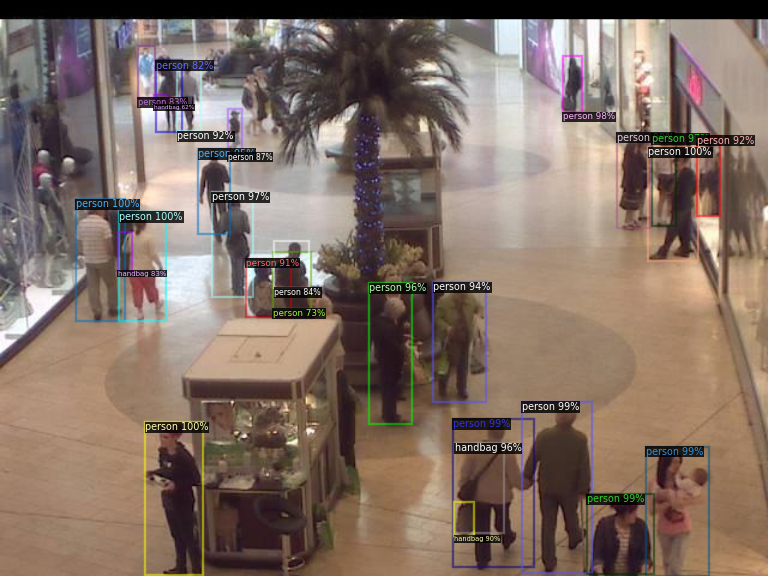

In [ ]:
# to clear directory
#!rm -rf SVM-based-human-detection

# to clone directory, -b for specific branch
!git clone -b mtk3-loading-images https://github.com/liuchentue/SVM-based-human-detection.git

img0001 = cv2.imread("SVM-based-human-detection/frames/seq_000001.jpg")



# Make prediction
outputs = predictor(img0001)

v = Visualizer(img0001[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
# All images written into list  images
import sys, os, glob
images = [cv2.imread(file) for file in sorted(glob.glob("SVM-based-human-detection/frames/*.jpg"))]

In [ ]:
# Part1 is finished here
for i in range (50):
  print("Image seq_",i+1)
  CountPerson(images[i])


Image seq_ 1
Number of people in the picture: 23
Image seq_ 2
Number of people in the picture: 31
Image seq_ 3
Number of people in the picture: 30
Image seq_ 4
Number of people in the picture: 34
Image seq_ 5
Number of people in the picture: 31
Image seq_ 6
Number of people in the picture: 27
Image seq_ 7
Number of people in the picture: 28
Image seq_ 8
Number of people in the picture: 32
Image seq_ 9
Number of people in the picture: 17
Image seq_ 10
Number of people in the picture: 18
Image seq_ 11
Number of people in the picture: 12
Image seq_ 12
Number of people in the picture: 14
Image seq_ 13
Number of people in the picture: 16
Image seq_ 14
Number of people in the picture: 18
Image seq_ 15
Number of people in the picture: 11
Image seq_ 16
Number of people in the picture: 13
Image seq_ 17
Number of people in the picture: 11
Image seq_ 18
Number of people in the picture: 17
Image seq_ 19
Number of people in the picture: 25
Image seq_ 20
Number of people in the picture: 23
Image seq

2016


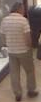

In [ ]:
person_dataset=[]
for i in range (100):
  pb=[]
  Identifyperson(images[i],pb)
  cropboxes(images[i],pb,person_dataset)

print(len(person_dataset))
cv2_imshow(person_dataset[0])

In [ ]:
resized_person_set=[]
for i in range(len(person_dataset)):
  resized = cv2.resize(person_dataset[i], (40,100), interpolation = cv2.INTER_AREA)
  resized_person_set.append(resized)
#Save the person_dataset
np_person_dataset = np.array(resized_person_set)
print(np_person_dataset.shape)
np.save("person_dataset", np_person_dataset, allow_pickle=True)

(2016, 100, 40, 3)


In [ ]:
# Class to encapsulate a particular window to check for collisions
class BoundingBox:
  def __init__(self, left, right, top, bottom):
    self.left = left
    self.right = right
    self.top = top
    self.bottom = bottom
  
  # Method to check if a given window collides with this bounding box
  def check_collision(self, x_left, x_right, y_top, y_bottom):
    # check each corner
    if self.left <= x_left and x_left <= self.right:
      if self.top <= y_top and y_top <= self.bottom:
        return True
      elif self.top <= y_bottom and y_bottom <= self.bottom:
        return True
    elif self.left <= x_right and x_right <= self.right:
      if self.top <= y_top and y_top <= self.bottom:
        return True
      elif self.top <= y_bottom and y_bottom <= self.bottom:
        return True
    # check center in case box is smaller and fully contained in search window
    # probably doesn't happen super often, but it did happen at least once
    # not a perfect solution, but should get most such collisions
    x_center = int(((x_right - x_left) / 2) + x_left)
    y_center = int(((y_bottom - y_top) / 2) + y_top)
    if self.left <= x_center and x_center <= self.right:
      if self.top <= y_center and y_center <= self.bottom:
        return True
    return False

In [ ]:
#Method to remove all persons inside the picture. "testim" is the image, "bx" indicates the location of persons
#Note: if we run this more than once in the same session, it will "erase" our bounding boxes, as it blacks out the people in the OG images, as stored in memory
def cropandfill(testim, bx):
  person_bounds = []
  for i in range(len(bx)):
    bxi=bx[i]
    x1=int(bxi[0])
    x2=int(bxi[2])
    y1=int(bxi[1])
    y2=int(bxi[3])
    #testim_cpy = testim.copy()
    #testim_cpy[x1:x2,y1:y2]=0
    testim[y1:y2,x1:x2]=0
    person_bounds.append(BoundingBox(x1, x2, y1, y2))
  return person_bounds

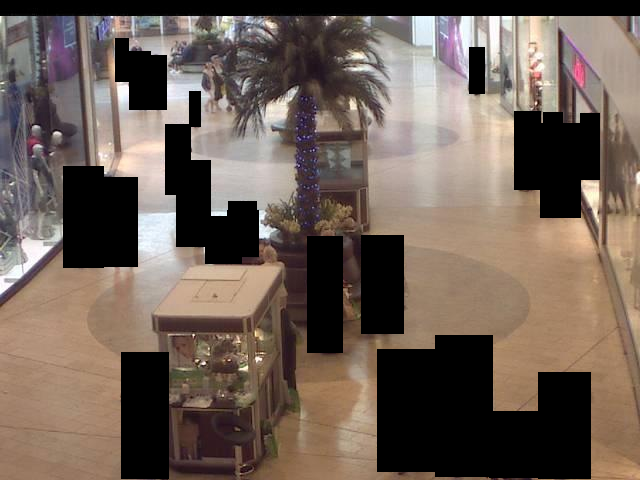

[<__main__.BoundingBox object at 0x7f5839c77390>, <__main__.BoundingBox object at 0x7f5839c77f98>, <__main__.BoundingBox object at 0x7f5839c777b8>, <__main__.BoundingBox object at 0x7f5839c77f60>, <__main__.BoundingBox object at 0x7f5839c77240>, <__main__.BoundingBox object at 0x7f5839c77710>, <__main__.BoundingBox object at 0x7f5839c772e8>, <__main__.BoundingBox object at 0x7f5839c77828>, <__main__.BoundingBox object at 0x7f5839c77e48>, <__main__.BoundingBox object at 0x7f5839c772b0>, <__main__.BoundingBox object at 0x7f5839c776a0>, <__main__.BoundingBox object at 0x7f5839c774e0>, <__main__.BoundingBox object at 0x7f5839c77c50>, <__main__.BoundingBox object at 0x7f5839c77d68>, <__main__.BoundingBox object at 0x7f5839c77e80>, <__main__.BoundingBox object at 0x7f5839c77ef0>, <__main__.BoundingBox object at 0x7f5839c77748>, <__main__.BoundingBox object at 0x7f5839c77b38>, <__main__.BoundingBox object at 0x7f5839c77438>, <__main__.BoundingBox object at 0x7f5839c77160>, <__main__.BoundingB

In [ ]:
tmpset=[]
for i in range (100):
  pb=[]
  tim=images[i].copy()
  Identifyperson(tim,pb)
  person_bounds = cropandfill(tim,pb)
  tmpset.append((tim, person_bounds))
cv2_imshow(tmpset[0][0])
print(tmpset[0][1])

In [ ]:
import random as rd

WINDOW_SIZES = ((100, 40), (120, 60), (80, 30))
#WINDOW_SIZE = (100, 40)

non_person_dataset=[]
for i in range (100):
  tim = tmpset[i][0]
  j = len(tmpset[i][1])
  while j > 0:
    # select a random valid window
    # test if it collides with any of the person bounds
    # if it does, don't decrement j (i.e., try again)
    # if not, decrement j
    # so for an image with 23 detected people, we'll also take 23 persons

    # randomly select a window size
    win_height, win_width = WINDOW_SIZES[rd.randint(0, len(WINDOW_SIZES) - 1)]
    #win_height, win_width = WINDOW_SIZE

    img_height, img_width = tim.shape[:2]
    y_center = rd.randint(0 + win_height / 2, img_height - (1 + win_height / 2))
    x_center = rd.randint(0 + win_width / 2, img_width - (1 + win_width / 2))
    y_top = int(y_center - win_height / 2)
    y_bottom = int(y_center + win_height / 2)
    x_left = int(x_center - win_width / 2)
    x_right = int(x_center + win_width / 2)

    is_colliding = False
    for box in tmpset[i][1]:
      if box.check_collision(x_left, x_right, y_top, y_bottom):
        is_colliding = True
    if not is_colliding:
      resized = cv2.resize(tim[y_top:y_bottom,x_left:x_right], (40,100), interpolation = cv2.INTER_AREA)
      non_person_dataset.append(resized)
      j -= 1

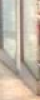

(2016, 100, 40, 3)


In [ ]:
cv2_imshow(non_person_dataset[130])

import numpy as np

# save the non-person dataset
np_non_person_dataset = np.array(non_person_dataset)
print(np_non_person_dataset.shape)
np.save("non_person_dataset", np_non_person_dataset, allow_pickle=True)

In [ ]:
# Building a person detector using SVM

from sklearn import svm
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from skimage.transform import resize
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from google.colab import drive
#drive.mount('/content/drive')


# Read in the image, make path = './' in-case you are running this locally
# Set the path for your image directory!!!
path = "/content/drive/My Drive/ECSE 415/Project/"

# load data from the flower subset
train_images = np.load(path + 'flower_subset.npz')['train_images']
train_labels = np.load(path + 'flower_subset.npz')['train_labels']
test_images = np.load(path + 'flower_subset.npz')['test_images']
test_labels = np.load(path + 'flower_subset.npz')['test_labels']

# to clear directory
#!rm -rf SVM-based-human-detection

# to clone directory, -b for specific branch
#!git clone -b mtk3-loading-images https://github.com/liuchentue/SVM-based-human-detection.git

# path = "SVM-based-human-detection/"
person_dataset = np.load(path + 'person_dataset.npz')
non_person_dataset = np.load(path + 'non_person_dataset.npz')





# HOG descriptor
img_size = (128, 48) # h x w in pixels
cell_size = (8, 8)  # h x w in pixels
block_size = (4, 4)  # h x w in cells
nbins = 4  # number of orientation bins

hog = cv2.HOGDescriptor(_winSize=(img_size[1] // cell_size[1] * cell_size[1],
                                  img_size[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

# resize the images
train_num = train_images.shape[0]
test_num = test_images.shape[0]
height = img_size[0]
width = img_size[1]

train_images_sized = np.zeros(shape=(train_num, height, width))
test_images_sized = np.zeros(shape=(test_num, height, width))

for i in range(train_num):
    train_images_sized[i] = resize(train_images[i], img_size)

for i in range(test_num):
    test_images_sized[i] = resize(test_images[i], img_size)

#print(train_images_sized.shape)
#print(test_images_sized.shape)

# compute HOG features
train_features = []
for i in range(train_num):
    train_features.append(hog.compute((255*train_images_sized[i]).astype(np.uint8)).reshape(1, -1))
train_features = np.vstack(train_features)

test_features = []
for i in range(test_num):
    test_features.append(hog.compute((255*test_images_sized[i]).astype(np.uint8)).reshape(1, -1))
test_features = np.vstack(test_features)

# Tune values of hyperparameters ‘gamma’ and ‘C’ to achieve test accuracy greater than 50%.
clf = svm.SVC(kernel='rbf', gamma=0.1, C=10) 
clf.fit(train_features[:], train_labels[:])
predictions = clf.predict(test_features[:])

# printing out the results
#print("Predicted Label:", predictions)
#print("Actual Label:", test_labels[:])

# calculate SVM test accuracy
matches = 0
for i in range(len(test_labels)):
  if predictions[i] == test_labels[i]:
    matches +=1

accuracy = matches/test_num
print("Final SVM Test Accuracy: ", accuracy)

Final SVM Test Accuracy:  0.6444444444444445


In [ ]:
best_acc = 0
best_gamma = -1
best_C = -1

# took ~26min
for curr_gamma in  np.logspace(-9, 3, 13):            # gamma = 0.1 from runs
  for curr_C in np.logspace(-2, 10, 13):              # C     = 10 from runs
    
    #print(curr_gamma, curr_C)
    clf = svm.SVC(kernel='rbf', gamma=curr_gamma, C=curr_C) 
    clf.fit(train_features[:], train_labels[:])
    predictions = clf.predict(test_features[:])

    # calculate SVM test accuracy
    matches = 0
    for i in range(len(test_labels)):
      if predictions[i] == test_labels[i]:
        matches +=1

    accuracy = matches/test_num
    if accuracy > best_acc:
      best_acc = accuracy
      best_gamma = curr_gamma
      best_C = curr_C
      print(best_acc)

print("Best SVM Test Accuracy: ", best_acc)


1e-09 0.01
0.1111111111111111
1e-09 0.1
1e-09 1.0
1e-09 10.0
1e-09 100.0
1e-09 1000.0
1e-09 10000.0
1e-09 100000.0
1e-09 1000000.0
1e-09 10000000.0
0.2
1e-09 100000000.0
1e-09 1000000000.0
1e-09 10000000000.0
1e-08 0.01
1e-08 0.1
1e-08 1.0
1e-08 10.0
1e-08 100.0
1e-08 1000.0
1e-08 10000.0
1e-08 100000.0
1e-08 1000000.0
0.4
1e-08 10000000.0
1e-08 100000000.0
1e-08 1000000000.0
1e-08 10000000000.0
1e-07 0.01
1e-07 0.1
1e-07 1.0
1e-07 10.0
1e-07 100.0
1e-07 1000.0
1e-07 10000.0
1e-07 100000.0
1e-07 1000000.0
0.5666666666666667
1e-07 10000000.0
1e-07 100000000.0
1e-07 1000000000.0
1e-07 10000000000.0
1e-06 0.01
1e-06 0.1
1e-06 1.0
1e-06 10.0
1e-06 100.0
1e-06 1000.0
1e-06 10000.0
1e-06 100000.0
0.5777777777777777
1e-06 1000000.0
1e-06 10000000.0
1e-06 100000000.0
1e-06 1000000000.0
1e-06 10000000000.0
1e-05 0.01
1e-05 0.1
1e-05 1.0
1e-05 10.0
1e-05 100.0
1e-05 1000.0
1e-05 10000.0
1e-05 100000.0
1e-05 1000000.0
1e-05 10000000.0
1e-05 100000000.0
1e-05 1000000000.0
1e-05 10000000000.0
0.000